# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
 df.isna().sum().sum()

0

## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [3]:
features = [x for x in df.columns if x != 'left_company']

X = df[features]
y = df['left_company']

Yes    500
No     500
Name: left_company, dtype: int64

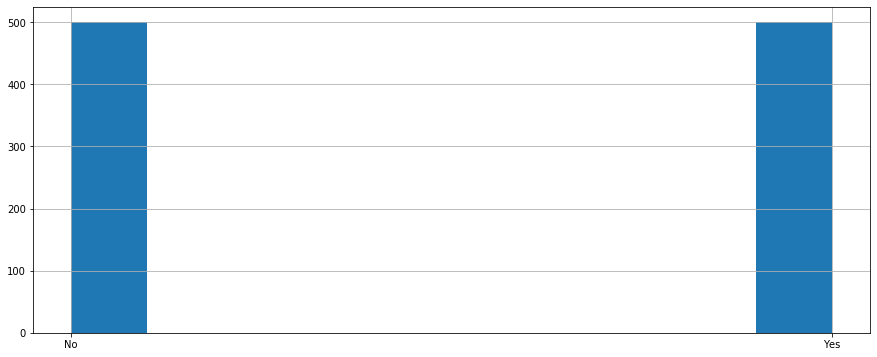

In [4]:
y.hist(bins =10, figsize=(15,6));
y.value_counts()

Inference: Balenced target variable and No Missing values in Dataset

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [5]:
#Convering Categorical Variables to Numerical Variables based
dummy_variable_1 = pd.get_dummies(X["married_or_single"])
dummy_variable_1.rename(columns={'married_or_single':'Single', 'married_or_single':'Divorced', 'married_or_single':'Married'}, inplace=True)
X = pd.concat([X, dummy_variable_1], axis=1)
X.drop("married_or_single", axis = 1, inplace=True)  

dummy_variable_2 = pd.get_dummies(X["frequency_of_travel"])
dummy_variable_2.rename(columns={'frequency_of_travel':'Travel_Frequently', 'frequency_of_travel':'Travel_Rarely', 'frequency_of_travel':'Non-Travel'}, inplace=True)
X = pd.concat([X, dummy_variable_2], axis=1)
X.drop("frequency_of_travel", axis = 1, inplace=True)
                                  
                                  
dummy_variable_3 = pd.get_dummies(X["department"])
dummy_variable_3.rename(columns={'department':'Sales', 'department':'Human Resources', 'department':'Research & Development'}, inplace=True)
X = pd.concat([X, dummy_variable_3], axis=1)
X.drop("department", axis = 1, inplace=True)   
                                  
X['gender'].replace(['Male', 'Female'],[1,0], inplace=True)
y.replace(['Yes','No'],[1,0], inplace=True) 

In [6]:
#Split Numerical Features
numerical_vars = [col for col in X.columns if X[col].dtypes!='O']
numerical_vars

['age',
 'commuting_distance',
 'education',
 'satisfaction_with_environment',
 'gender',
 'seniority_level',
 'satisfaction_with_job',
 'last_raise_pct',
 'last_performance_rating',
 'total_years_working',
 'years_at_company',
 'years_in_current_job',
 'years_since_last_promotion',
 'years_with_current_supervisor',
 'Divorced',
 'Married',
 'Single',
 'Non-Travel',
 'Travel_Frequently',
 'Travel_Rarely',
 'Human Resources',
 'Research & Development',
 'Sales']

In [7]:
# Split Categorical_Features 
categorical_Vars  = [col for col in X.columns if (X[col].dtypes=='O')]
categorical_Vars

['position']


Inference:  Converted Some Catogirical Variables to Numerical including Target variable.

list of varibales converted: 
frequency_of_travel 
department
gender
married_or_single
left_company

The choice depends on the number of categories in the variable column

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [8]:
# insert code here
#Consider Indipendent Numerical Variables 
X[numerical_vars].head()

,age,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,satisfaction_with_job,last_raise_pct,last_performance_rating,total_years_working,...,years_with_current_supervisor,Divorced,Married,Single,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,37,16,4,4,1,2,3,19,3,9,...,0,1,0,0,0,0,1,0,0,1
1,39,3,2,3,1,2,3,15,3,11,...,7,1,0,0,0,0,1,0,1,0
2,52,25,4,3,0,4,4,22,4,31,...,0,0,1,0,0,1,0,0,1,0
3,50,1,3,4,0,2,3,12,3,19,...,13,0,1,0,1,0,0,0,0,1
4,44,4,3,4,1,2,2,12,3,10,...,3,0,0,1,0,0,1,0,1,0


In [9]:
# Import library for VIF
#VIF = 1 then No Correlation b/w independent and dependent variables
#VIF  exceeding 5 or 10 indicates high multicollinearity b/w independent and dependent variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [10]:
calc_vif(X[numerical_vars])

,variables,VIF
0,age,1.975605
1,commuting_distance,1.030360
2,education,1.061874
3,satisfaction_with_environment,1.026134
4,gender,1.063810
5,seniority_level,2.845097
6,satisfaction_with_job,1.042657
7,last_raise_pct,2.794257
8,last_performance_rating,2.854939
9,total_years_working,4.641777



Inference:
Here we can understand multicolinearity is existing between 2 variables but it's not greater then 5 (exceeding 5 is high multicolinearity)


   variables	      VIF
total_years_working	4.641777
years_at_company	4.733900

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (800, 24) (800,)
Test set: (200, 24) (200,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [12]:
#pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for Numerical variables
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator

pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    #('rob_num',StandardScaler())
])

ct_Numerical = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_num', pp_num, numerical_vars)
])


#pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for categorical variables
pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='error',drop='if_binary'))
])


ct_catogirical = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_cat', pp_cat, categorical_Vars)
])


In [13]:
Numerical_train= ct_Numerical.fit_transform(X_train).astype(np.float)
Catogirical_train= ct_catogirical.fit_transform(X_train).astype(np.float)
print('Numerical train  Data Shape:',Numerical_train.shape)
print('Catogirical train  Data Shape:',Catogirical_train.shape)


Numerical train  Data Shape: (800, 23)
Catogirical train  Data Shape: (800, 9)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
ct = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_num', pp_num, numerical_vars),
    ('pp_cat', pp_cat, categorical_Vars)
])

In [15]:
xtrain= ct.fit_transform(X_train).astype(np.float)
pd.DataFrame(xtrain).head() 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,35.0,7.0,3.0,3.0,1.0,3.0,3.0,21.0,4.0,17.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,33.0,14.0,3.0,3.0,1.0,1.0,4.0,13.0,3.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.0,14.0,4.0,3.0,1.0,2.0,2.0,18.0,3.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30.0,15.0,2.0,3.0,1.0,3.0,1.0,11.0,3.0,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27.0,16.0,4.0,3.0,0.0,1.0,2.0,14.0,3.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
xtest=ct.transform(X_test).astype(np.float)
xtest

array([[27.,  5.,  3., ...,  1.,  0.,  0.],
       [33.,  9.,  4., ...,  0.,  1.,  0.],
       [26.,  8.,  3., ...,  0.,  1.,  0.],
       ...,
       [46.,  9.,  3., ...,  0.,  1.,  0.],
       [37., 11.,  3., ...,  0.,  0.,  0.],
       [25.,  3.,  3., ...,  0.,  0.,  0.]])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
pipe_final = Pipeline([
    ('ct_step', ct),
    ('model', LogisticRegression())
])


In [18]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
import matplotlib.pyplot as plt
import itertools
pipe_final.fit(X_train, y_train)
yhat_train = pipe_final.predict(X_train)
yhat_test = pipe_final.predict(X_test)


In [19]:
#Accuracy on Training Set
acc_Train = accuracy_score(y_train, yhat_train)
acc_Train

0.7275

In [20]:
#Accuracy on Test Set
acc_Test = accuracy_score(y_test,yhat_test)
acc_Test

0.665


Inference:

Underfitting : Model is not working well on Training data and Test data 
OverFitting : Model is working well on training data but not Test Data 

Model is Overfitting, so it's not working well on Unknown data

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

Steps for continuing to develop and evaluate a model
1.Since it's a classification model so we can develop model using different Alogorithms like 
  KNN, SVC, Decision Trees , Random Forest...etc.. 
  based on Accuracy we can select best model
  
2.Using Cross Validation with GridSearchCv and RandomisedSerachCV for avoding Biasvariance in Model

3.Converting Categorical to Numerical some times One-Hot Encoding is not best method because it will Creating Sparce matrix. 
  Model effected by this features so here, I used One-Hot Encoding only on one feature 
